In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
from __future__ import  division
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Fourier Transform
--------------

The Discrete Fourier Transform (DFT) is the primary analysis tool for digital signal processing. By using matrix/vector representation, the DFT can be understood as a transformation of digital signals into a new vector space.

In this space  the columns of the DFT are the basis vectors. One important idea is that we call these vectors as "frequencies", but mathematically they simply represent the original data in a different space.

This is the mathematical definition of DFT matrix

$$ \mathbf{U} = \frac{1}{\sqrt N} \left[ \exp \left( j \frac{2\pi}{N} n k \right) \right]_{n\in\{0,N_s-1\},k\in\{0,N-1\}} $$


where $n$ counts the samples as rows and $k$ indexes the discrete frequencies (which are our new basis) as columns. 

In [3]:
Nfft=8 # Number of frequency bins 
Ns=8

def dftmatrix(Nfft=32,N=None):
    """ construct DFT matrix """
    k= np.arange(Nfft)
    if N is None: 
        N = Nfft
    n = np.arange(N)
    U = np.matrix(np.exp(1j * 2*np.pi/Nfft * k*n[:,None])) # use numpy broadcasting to create matrix
    return U/np.sqrt(Nfft)


U = dftmatrix(Nfft=Nfft,N=Ns)


We can plot these basis as pairs of real and imaginary vectors

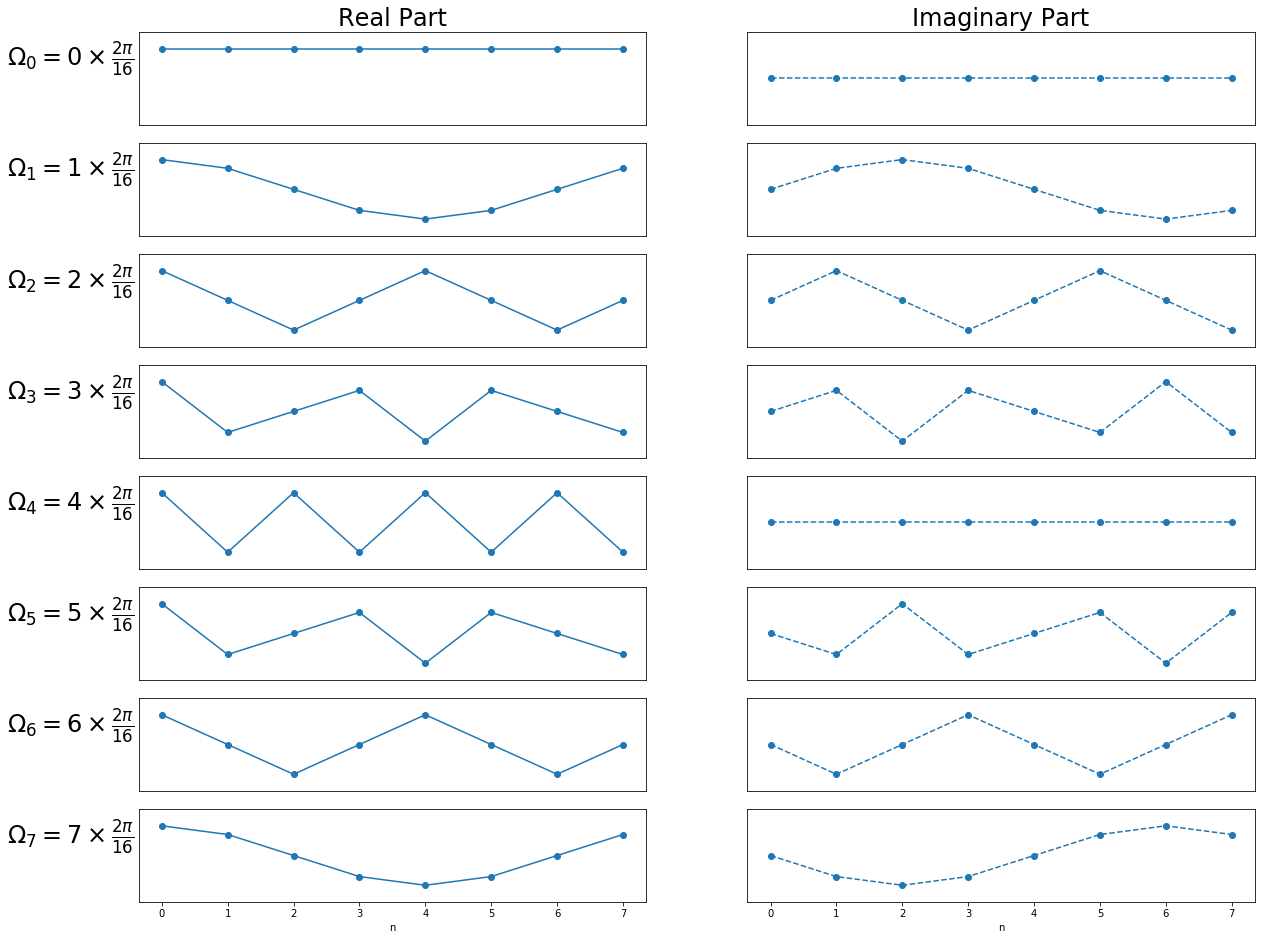

In [8]:
# rcParams['figure.figsize'] = (20, 16)

plt.figure(figsize=(20,16))

# plots in the left column
plt.subplot(Nfft,2,1)
plt.title('Real Part', fontsize=24)

for i in range(Nfft):
    plt.subplot(Nfft,2,2*i+1)
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(r'$\Omega_{%d}=%d\times\frac{2\pi}{16}$'%(i,i),fontsize=24, 
                 rotation='horizontal',horizontalalignment='right')
    plt.plot(np.array(U.real[:,i]),'-o')
    plt.axis(ymax=4/Nfft*1.1, ymin=-4/Nfft*1.1)
plt.xticks(np.arange(Nfft))
plt.xlabel('n')

# plots in the  right column
plt.subplot(Nfft,2,2)
plt.title('Imaginary Part', fontsize=24)

for i in range(Nfft):
    plt.subplot(Nfft,2,2*(i+1))
    plt.xticks([])
    plt.yticks([])
    plt.plot(np.array(U.imag[:,i]),'--o')
    plt.axis(ymax=4/Nfft*1.1,ymin=-4/Nfft*1.1)    
plt.xticks(np.arange(Nfft))
plt.xlabel('n')

# fig.savefig('figure_00@.png', bbox_inches='tight', dpi=300)

We will not prove this, but the following relations are important to know:
 
* The vectors are orthogonal (dot product of different vectors is zero)
* The Real and Imaginary parts are shifted by 90 degrees
* The inverse of DFT is conjugate transpose of DFT
* Nyquist relations can be seen directly from observing the vectors - the frequencies are symmetric around Nfft/2 for the Real part and anti-symmetric for Imaginary part. This eventually leads to the fact that we have only Nfft/2 frequencies.


Computing the DFT
--------------------

To compute the DFT using the matrix, we calculate the following,

$$ \mathbf{X} = \mathbf{U}^H \mathbf{x}$$

which individually takes each of the columns of $\mathbf{U}$ and computes the inner product as the $i^{th}$ entry,

$$ \mathbf{X}_i = \mathbf{U}_i^H \mathbf{x}$$

That is, we are measuring the *degree of similarity* between each column of $\mathbf{U}$ and the input vector. We can think of this as the coefficient of the projection of $\mathbf{x}$ onto  $\mathbf{u}_i$.

We can retrieve the original input from the DFT by calculating

$$ \mathbf{x} = \mathbf{U} \mathbf{U}^H \mathbf{X} $$


### Example: finding a frequency of a signal

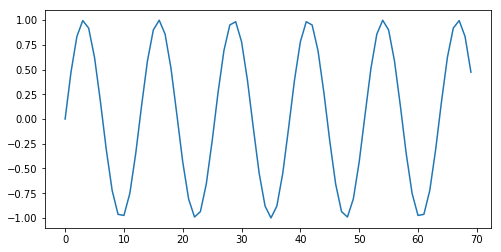

In [11]:
Ns = 70
Nfft = Ns
freq = 5.5/Ns
t = np.arange(Ns)
x = np.sin(2*np.pi*freq*t)

plt.figure(figsize=(8,4))
plt.plot(x)

<Container object of 3 artists>

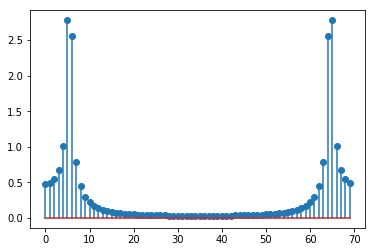

In [13]:
U = dftmatrix(Nfft=Nfft,N=Ns)
x = np.matrix(x)
X = U.T*x.T

plt.stem(np.array(abs(X)))

# The DCT (Discrete Cosine Transform)

JPEG image compression uses DCT with 8 coefficients.

The matrix is defined by this formula :

$$ 
G_u = \sqrt{\frac{2}{N}} \frac{1}{\sqrt{2}} f_0 + 
\sqrt{\frac{2}{N}} \sum_{i=1}^7 f_i \, cos\left( \frac{\pi}{8} (u + \frac{1}{2}) x \right)
$$

where $$f_0 = [1 0 0 ... 0], f_1 = [0 1 0 ... 0], f_N = [0 0 ... 0 1]$$ are the "standard basis", and u are spatial frequencies.


In [16]:
# The 8 x 8 DCT matrix thus looks like this.
N = 8
dct = np.matrix(np.zeros((N, N)))
for x in range(N):
    dct[0,x] = np.sqrt(2.0/N) / np.sqrt(2.0)
for u in xrange(1,N):
    for x in xrange(N):
        dct[u,x] = np.sqrt(2.0/N) * np.cos((np.pi/N) * u * (x + 0.5) )
        
np.set_printoptions(precision=3)
dct

matrix([[ 0.354,  0.354,  0.354,  0.354,  0.354,  0.354,  0.354,  0.354],
        [ 0.49 ,  0.416,  0.278,  0.098, -0.098, -0.278, -0.416, -0.49 ],
        [ 0.462,  0.191, -0.191, -0.462, -0.462, -0.191,  0.191,  0.462],
        [ 0.416, -0.098, -0.49 , -0.278,  0.278,  0.49 ,  0.098, -0.416],
        [ 0.354, -0.354, -0.354,  0.354,  0.354, -0.354, -0.354,  0.354],
        [ 0.278, -0.49 ,  0.098,  0.416, -0.416, -0.098,  0.49 , -0.278],
        [ 0.191, -0.462,  0.462, -0.191, -0.191,  0.462, -0.462,  0.191],
        [ 0.098, -0.278,  0.416, -0.49 ,  0.49 , -0.416,  0.278, -0.098]])

Now we define the 2D version of the N=8 DCT described above.  
For an image matrix A we apply the 1D DCT to every column, *and* then also apply it to every row, i.e.

$$ G = {DCT} \cdot A \cdot {DCT}^{T} $$

and vice versa 

$$ A = {DCT}^{T} \cdot G \cdot {DCT} $$

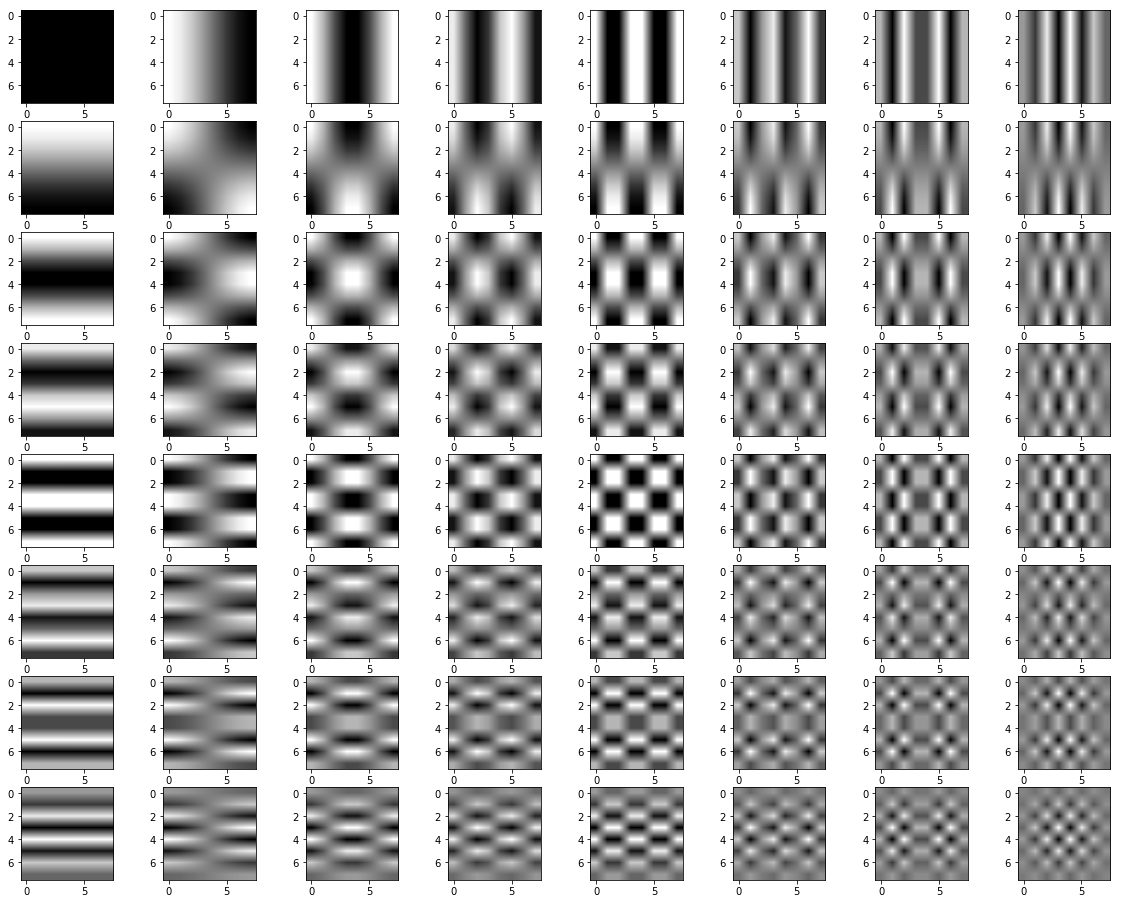

In [22]:
plt.figure(figsize=(20,16))

for i in range(8):
    for j in range(8):
        G = np.matrix(np.zeros((8,8)))
        G[i,j] = 1
        A = dct.T*G*dct
        plt.subplot(8,8,i*8+j+1)
        plt.imshow(A,cmap='gray', interpolation='bilinear')